<h2>Importing Libraries :

---



In [501]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick
from sklearn import svm
from sklearn.svm import LinearSVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split , cross_val_score , GridSearchCV
from sklearn.preprocessing import LabelEncoder , StandardScaler , LabelBinarizer
from sklearn.metrics import accuracy_score , classification_report , confusion_matrix , roc_curve, auc , roc_auc_score
!pip install lifelines
from lifelines import KaplanMeierFitter
from sklearn.utils import resample
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

<h2> Dataset :

---



In [502]:
data = pd.read_csv('/content/Breast Cancer METABRIC.csv')

In [503]:
data.head()

,Patient ID,Age at Diagnosis,Type of Breast Surgery,Cancer Type,Cancer Type Detailed,Cellularity,Chemotherapy,Pam50 + Claudin-low subtype,Cohort,ER status measured by IHC,...,Overall Survival Status,PR Status,Radio Therapy,Relapse Free Status (Months),Relapse Free Status,Sex,3-Gene classifier subtype,Tumor Size,Tumor Stage,Patient's Vital Status
0,MB-0000,75.65,Mastectomy,Breast Cancer,Breast Invasive Ductal Carcinoma,NaN,No,claudin-low,1.0,Positve,...,Living,Negative,Yes,138.65,Not Recurred,Female,ER-/HER2-,22.0,2.0,Living
1,MB-0002,43.19,Breast Conserving,Breast Cancer,Breast Invasive Ductal Carcinoma,High,No,LumA,1.0,Positve,...,Living,Positive,Yes,83.52,Not Recurred,Female,ER+/HER2- High Prolif,10.0,1.0,Living
2,MB-0005,48.87,Mastectomy,Breast Cancer,Breast Invasive Ductal Carcinoma,High,Yes,LumB,1.0,Positve,...,Deceased,Positive,No,151.28,Recurred,Female,NaN,15.0,2.0,Died of Disease
3,MB-0006,47.68,Mastectomy,Breast Cancer,Breast Mixed Ductal and Lobular Carcinoma,Moderate,Yes,LumB,1.0,Positve,...,Living,Positive,Yes,162.76,Not Recurred,Female,NaN,25.0,2.0,Living
4,MB-0008,76.97,Mastectomy,Breast Cancer,Breast Mixed Ductal and Lobular Carcinoma,High,Yes,LumB,1.0,Positve,...,Deceased,Positive,Yes,18.55,Recurred,Female,ER+/HER2- High Prolif,40.0,2.0,Died of Disease


In [504]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2509 entries, 0 to 2508
Data columns (total 34 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Patient ID                      2509 non-null   object 
 1   Age at Diagnosis                2498 non-null   float64
 2   Type of Breast Surgery          1955 non-null   object 
 3   Cancer Type                     2509 non-null   object 
 4   Cancer Type Detailed            2509 non-null   object 
 5   Cellularity                     1917 non-null   object 
 6   Chemotherapy                    1980 non-null   object 
 7   Pam50 + Claudin-low subtype     1980 non-null   object 
 8   Cohort                          2498 non-null   float64
 9   ER status measured by IHC       2426 non-null   object 
 10  ER Status                       2469 non-null   object 
 11  Neoplasm Histologic Grade       2388 non-null   float64
 12  HER2 status measured by SNP6    19

In [505]:
data.describe()

,Age at Diagnosis,Cohort,Neoplasm Histologic Grade,Lymph nodes examined positive,Mutation Count,Nottingham prognostic index,Overall Survival (Months),Relapse Free Status (Months),Tumor Size,Tumor Stage
count,2498.000000,2498.000000,2388.000000,2243.000000,2357.000000,2287.000000,1981.000000,2388.000000,2360.000000,1788.000000
mean,60.420300,2.900320,2.412060,1.950513,5.578702,4.028787,125.244271,108.842487,26.220093,1.713647
std,13.032997,1.962216,0.649363,4.017774,3.967967,1.189092,76.111772,76.519494,15.370883,0.655307
min,21.930000,1.000000,1.000000,0.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000
25%,50.920000,1.000000,2.000000,0.000000,3.000000,3.048000,60.866667,40.560000,17.000000,1.000000
50%,61.110000,3.000000,3.000000,0.000000,5.000000,4.044000,116.466667,99.095000,22.410000,2.000000
75%,70.000000,4.000000,3.000000,2.000000,7.000000,5.040000,185.133333,167.640000,30.000000,2.000000
max,96.290000,9.000000,3.000000,45.000000,80.000000,7.200000,355.200000,384.210000,182.000000,4.000000


In [506]:
data.isnull().sum()

,0
Patient ID,0
Age at Diagnosis,11
Type of Breast Surgery,554
Cancer Type,0
Cancer Type Detailed,0
Cellularity,592
Chemotherapy,529
Pam50 + Claudin-low subtype,529
Cohort,11
ER status measured by IHC,83


<h2> Handling Missing Values :

---



In [507]:
def fill_3_gene_subtype(row):
    if pd.isnull(row['3-Gene classifier subtype']):
        if row['ER Status'] == 'Positive' and row['HER2 Status'] == 'Negative' and row['Pam50 + Claudin-low subtype'] == 'LumA':
            return 'ER+/HER2-Low Prolif'
        elif row['ER Status'] == 'Positive' and row['HER2 Status'] == 'Negative' and row['Pam50 + Claudin-low subtype'] == 'LumB':
            return 'ER+/HER2-High Prolif'
        elif row['ER Status'] == 'Negative' and row['HER2 Status'] == 'Negative':
            return 'ER-/HER2-'
        elif row['ER Status'] == 'Negative' and row['HER2 Status'] == 'Positive':
            return 'HER2+'
    return row['3-Gene classifier subtype']

data['3-Gene classifier subtype'] = data.apply(fill_3_gene_subtype, axis=1)

In [508]:
def fill_tumor(row):
    if pd.isnull(row['Tumor Other Histologic Subtype']):
        if row['Cancer Type Detailed'] == 'Breast Invasive Ductal Carcinoma':
            return 'Ductal/NST'
        if row['Cancer Type Detailed'] == 'Breast Mixed Ductal and Lobular Carcinoma':
            return 'Mixed'
    return row['Cancer Type Detailed']

data['Tumor Other Histologic Subtype'] = data.apply(fill_tumor, axis=1)

In [509]:
data = data[data['HER2 status measured by SNP6'] != 'Undef']

In [510]:
data = data.dropna()

<h2> Converting Dataypes ( Float To Integers ) :

---



In [511]:
data['Age at Diagnosis'] = data['Age at Diagnosis'].round().astype(int)
data['Cohort'] = data['Cohort'].round().astype(int)
data['Neoplasm Histologic Grade'] = data['Neoplasm Histologic Grade'].round().astype(int)
data['Lymph nodes examined positive'] = data['Lymph nodes examined positive'].round().astype(int)
data['Mutation Count'] = data['Mutation Count'].round().astype(int)

<h3> Removing Unwanted Columns :

---



In [512]:
del data['Patient ID']
del data['Sex']
del data['Cancer Type']
del data['Cancer Type Detailed']
del data['Tumor Other Histologic Subtype']
del data['ER Status']

<H2> Data Exploration :

---



<h4> 1. Age Distribution

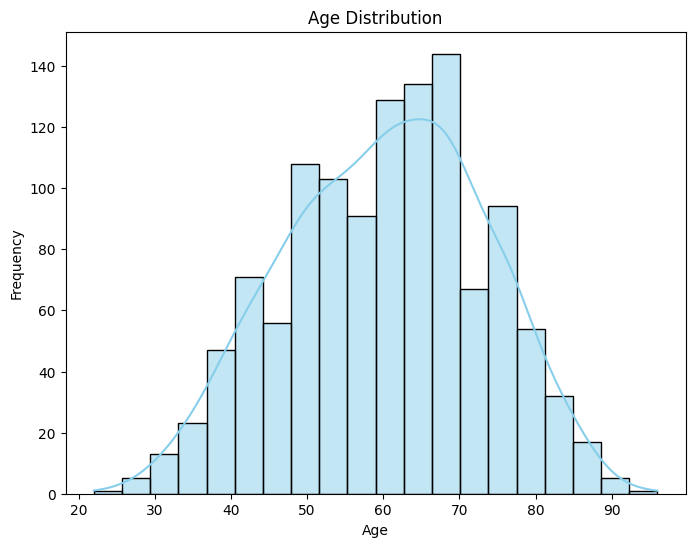

In [513]:
plt.figure(figsize = (8 , 6))
sns.histplot(data['Age at Diagnosis'] , bins = 20 , kde = True , color = 'skyblue')
plt.title('Age Distribution')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

<H4> 2. Distribution Of Continuous Variables

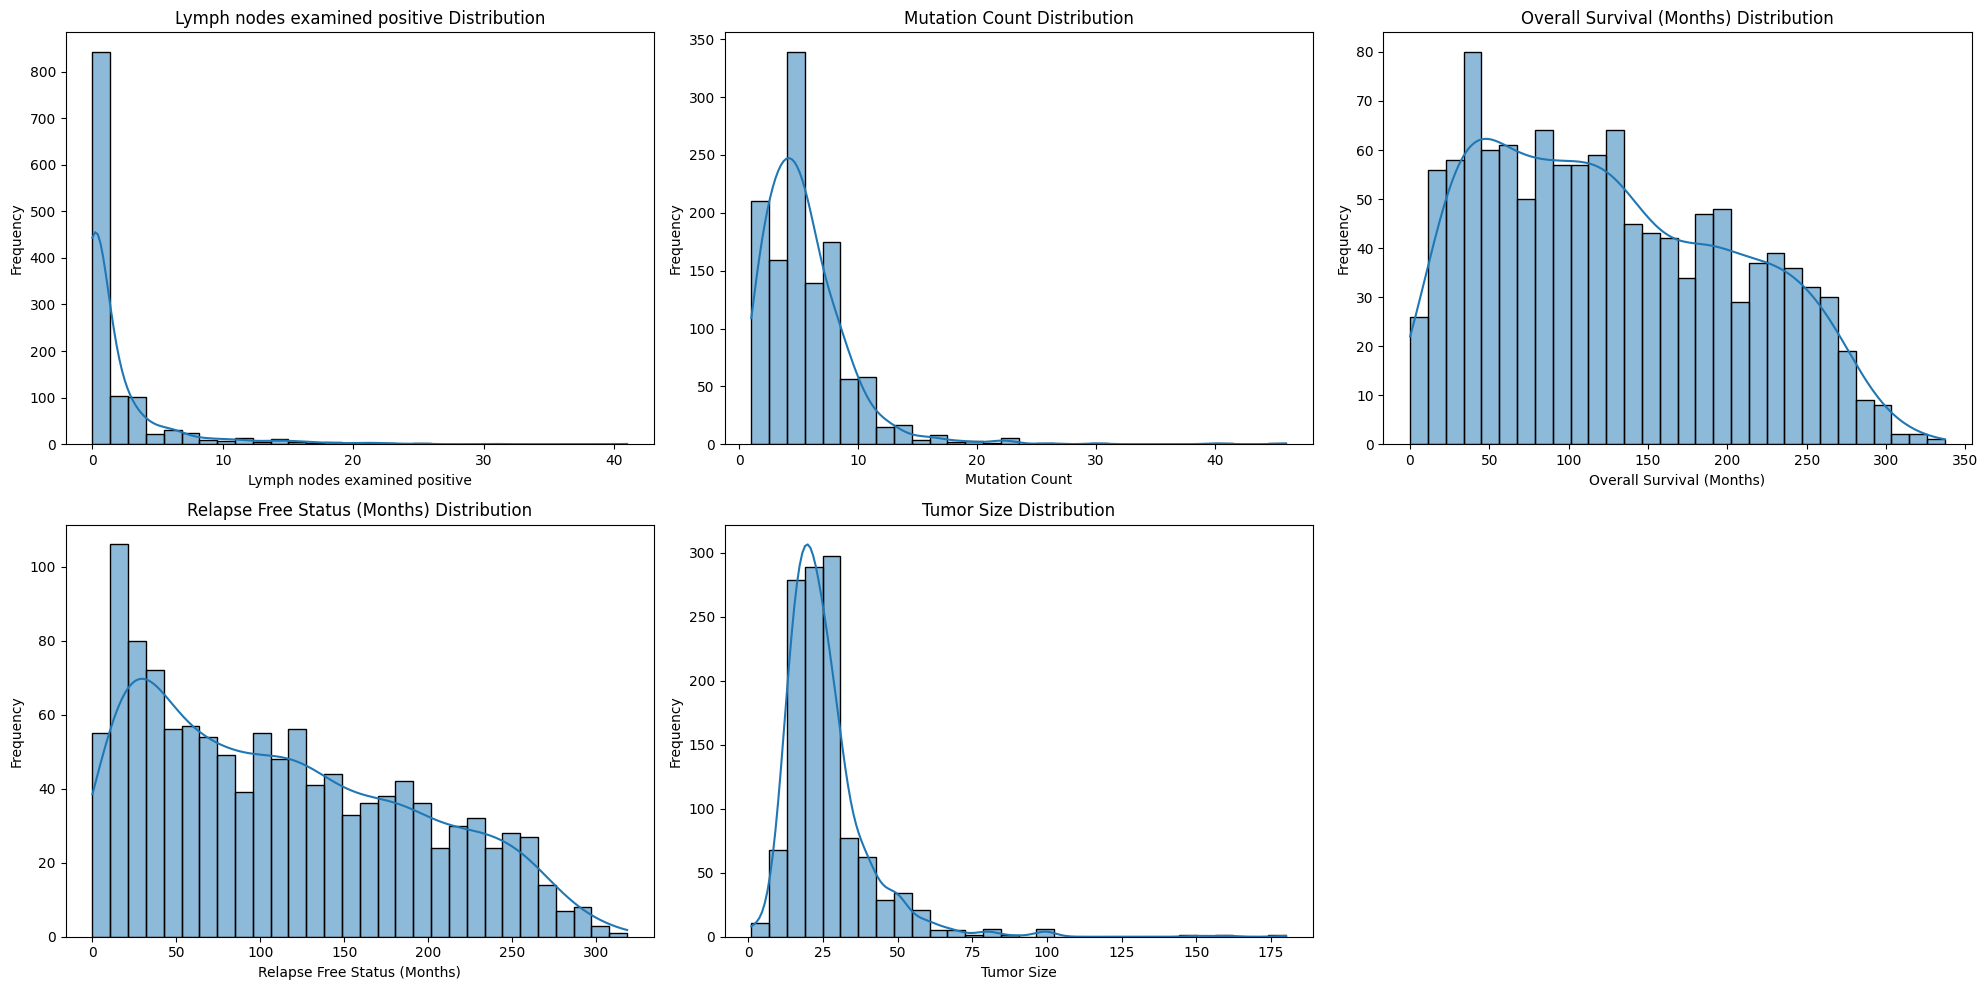

In [514]:
numerical_columns = ['Lymph nodes examined positive','Mutation Count','Overall Survival (Months)','Relapse Free Status (Months)','Tumor Size']

num_cols = len(numerical_columns)
rows = (num_cols // 3) + (1 if num_cols % 3 != 0 else 0)
fig, axes = plt.subplots(rows , 3, figsize = (20 , rows * 5))
axes = axes.flatten()

for i, column in enumerate(numerical_columns):
    sns.histplot(data[column] , kde = True , bins = 30 , ax = axes[i])
    axes[i].set_title(f'{column} Distribution')
    axes[i].set_ylabel('Frequency')

for i in range(len(numerical_columns), len(axes)):
    fig.delaxes(axes[i])

plt.tight_layout()
plt.show()

<h4>3. Numerical Features VS Target Variable

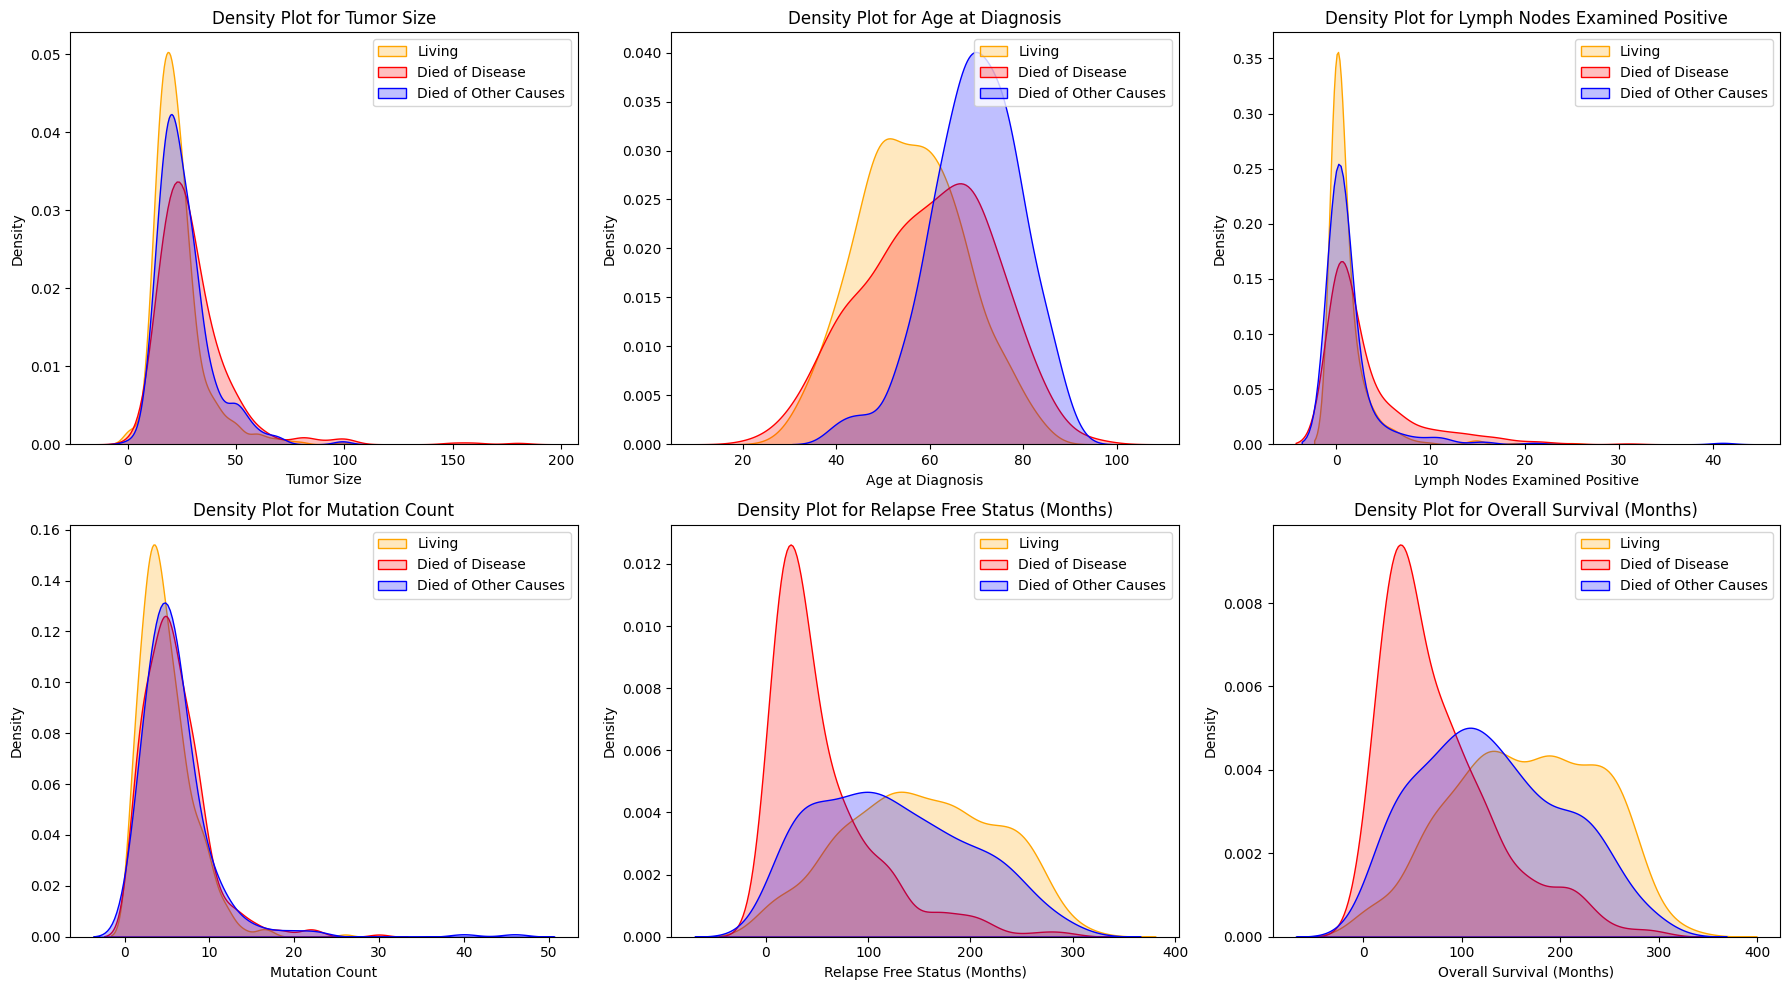

In [515]:
fig , axes = plt.subplots(2 , 3 , figsize = (18 , 10) , tight_layout = True)

features = [
    ('Tumor Size', 'Tumor Size'),
    ('Age at Diagnosis', 'Age at Diagnosis'),
    ('Lymph nodes examined positive', 'Lymph Nodes Examined Positive'),
    ('Mutation Count', 'Mutation Count'),
    ('Relapse Free Status (Months)', 'Relapse Free Status (Months)'),
    ('Overall Survival (Months)', 'Overall Survival (Months)'),
]

colors = ['Orange' , 'Red' , 'Blue']
labels = ['Living' , 'Died of Disease' , 'Died of Other Causes']

for ax , (feature , xlabel) in zip(axes.flat , features):
    for color, label in zip(colors, labels):
        sns.kdeplot(
            data[feature][data["Patient's Vital Status"] == label] , ax = ax , color = color , shade = True , label = label)
    ax.set_title(f'Density Plot for {xlabel}')
    ax.set_xlabel(xlabel)
    ax.set_ylabel('Density')
    ax.legend(loc = 'upper right')

plt.show()

<h4> 4. Patient Vital Status Distribution

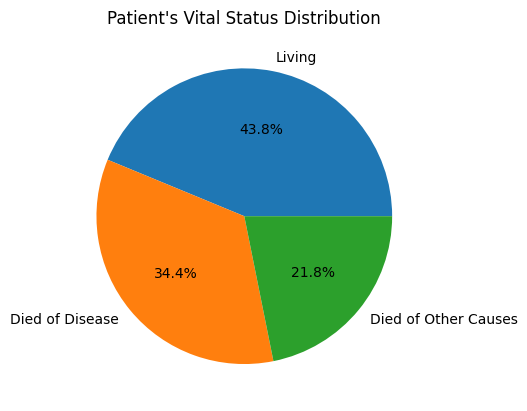

In [516]:
Patients_vital_status = data["Patient's Vital Status"].value_counts(normalize = 2)
plt.pie(Patients_vital_status , labels = Patients_vital_status.index , autopct= '%1.1f%%')
plt.title("Patient's Vital Status Distribution")
plt.show()

<h4> 5. Breast Surgery Distribution Chart

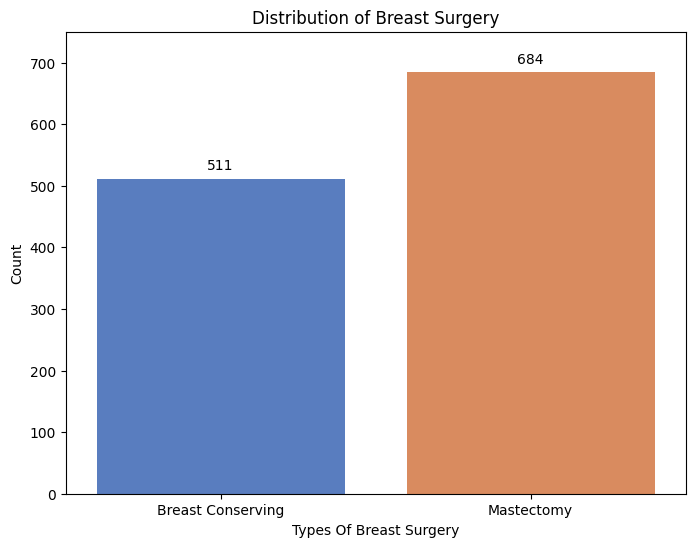

In [517]:
plt.figure(figsize = (8 , 6))
ax = sns.countplot(data = data , x = 'Type of Breast Surgery', palette = 'muted' )
for p in ax.patches:
    ax.annotate(f'{int(p.get_height())}' , (p.get_x() + p.get_width() / 2, p.get_height() + 10),
                ha = 'center' , va = 'bottom' , fontsize = 10 )
ax.set_ylim(0 , 750)
plt.title('Distribution of Breast Surgery')
plt.xlabel('Types Of Breast Surgery')
plt.ylabel('Count')
plt.show()

<h4> 6. Cancer Type Distribution



In [518]:
Oncotree_code = data['Oncotree Code'].value_counts().index

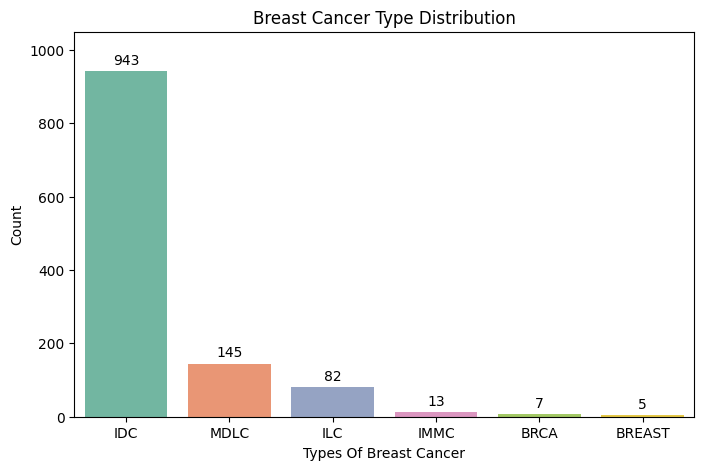

In [519]:
plt.figure(figsize = (8,5))
ax = sns.countplot(data = data , x = 'Oncotree Code' , order = Oncotree_code , palette = 'Set2' )
for p in ax.patches:
    ax.annotate(f'{int(p.get_height())}' , (p.get_x() + p.get_width() / 2, p.get_height() + 10),
                ha = 'center' , va = 'bottom' , fontsize = 10 )
ax.set_ylim(0 , 1050)
plt.title('Breast Cancer Type Distribution')
plt.xlabel('Types Of Breast Cancer')
plt.ylabel('Count')
plt.show()

<h4> 7. Therapy Distribution ( Chemotherapy , Hormone Therapy , Radio Therapy )

In [520]:
Therapy = data[['Chemotherapy','Hormone Therapy','Radio Therapy']].melt(var_name = 'Therapy Type', value_name = 'Therapy Status')

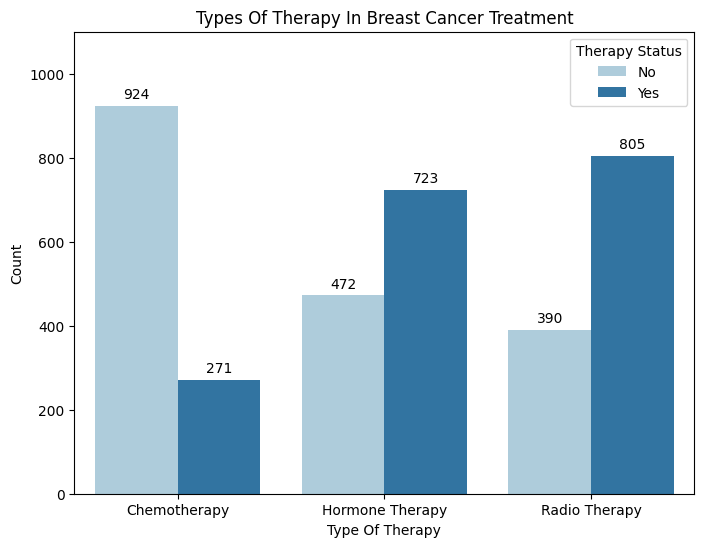

In [521]:
plt.figure(figsize = (8 , 6))
ax = sns.countplot(data = Therapy , x = 'Therapy Type', hue = 'Therapy Status', palette = 'Paired')
for p in ax.patches:
    height = p.get_height()
    if height > 0:
        ax.annotate(f'{int(height)}',
                    (p.get_x() + p.get_width() / 2, height + 10),
                    ha='center', va='bottom', fontsize=10)
ax.set_ylim(0 , 1100)
plt.title('Types Of Therapy In Breast Cancer Treatment')
plt.xlabel('Type Of Therapy')
plt.ylabel('Count')
plt.show()

<h4> 8. Cellularity Distribution

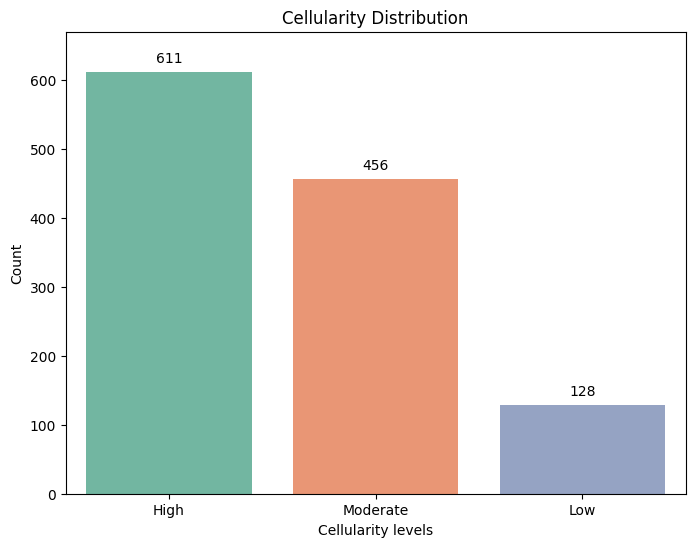

In [522]:
plt.figure(figsize = (8 , 6))
ax = sns.countplot(data = data , x = 'Cellularity' , palette = 'Set2')
for p in ax.patches:
    ax.annotate(f'{int(p.get_height())}' , (p.get_x() + p.get_width() / 2, p.get_height() + 10),
                ha = 'center' , va = 'bottom' , fontsize = 10 )
ax.set_ylim(0 , 670)
plt.title('Cellularity Distribution')
plt.xlabel('Cellularity levels')
plt.ylabel('Count')
plt.show()

<h4> 9. Tumor Size By Cancer Type

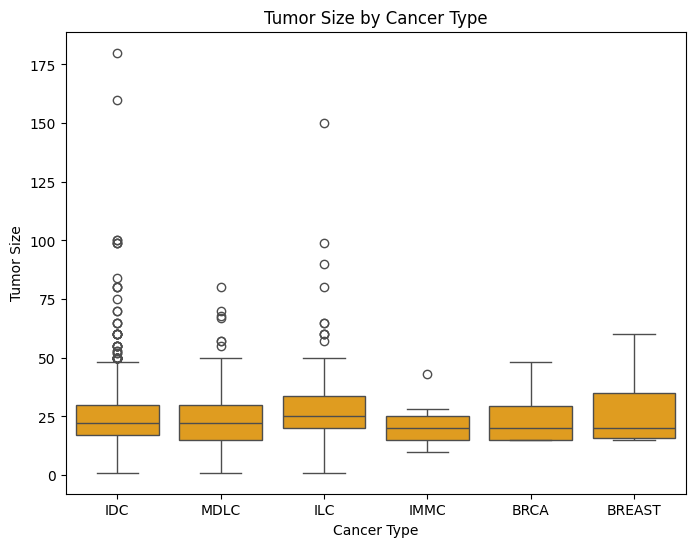

In [523]:
plt.figure(figsize = (8 , 6))
sns.boxplot(x = 'Oncotree Code', y = 'Tumor Size', data = data , color = 'orange')
plt.title('Tumor Size by Cancer Type')
plt.xlabel('Cancer Type')
plt.show()

<h4> 10. Distribution of Age Vs Tumor Size Vs Mutation Count

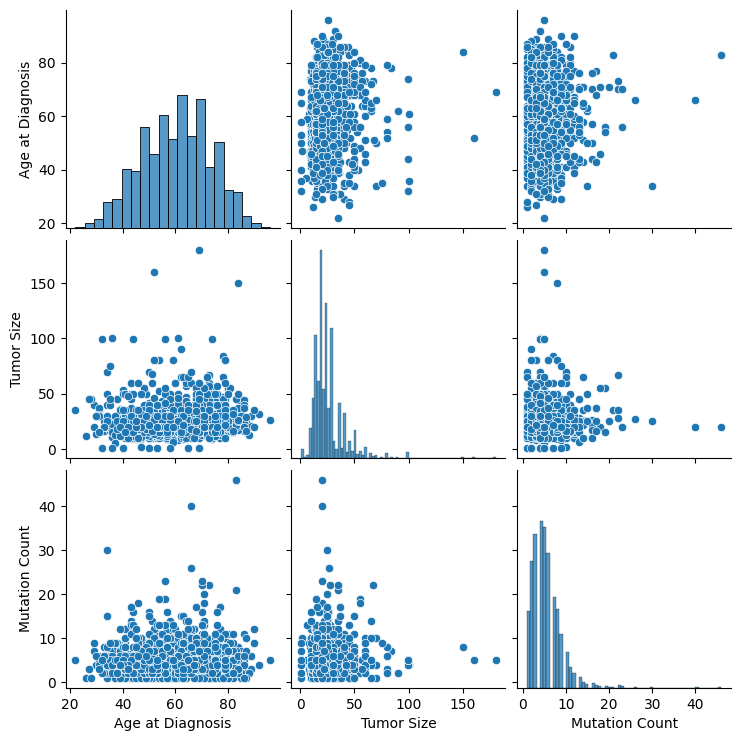

In [524]:
sns.pairplot(data[['Age at Diagnosis' , 'Tumor Size' , 'Mutation Count']])
plt.show()

<h4> 11. Tumor Size Vs Age at Diagnosis

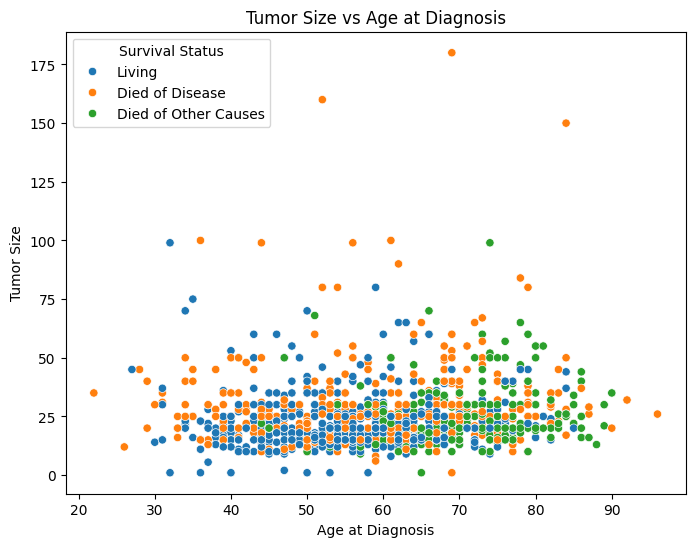

In [525]:
plt.figure(figsize = (8 , 6))
sns.scatterplot(x = 'Age at Diagnosis', y = 'Tumor Size', hue = "Patient's Vital Status", data = data)
plt.title('Tumor Size vs Age at Diagnosis')
plt.xlabel('Age at Diagnosis')
plt.ylabel('Tumor Size')
plt.legend(title = 'Survival Status')
plt.show()

<h4> 12. Patient Survival Status By Different Factors


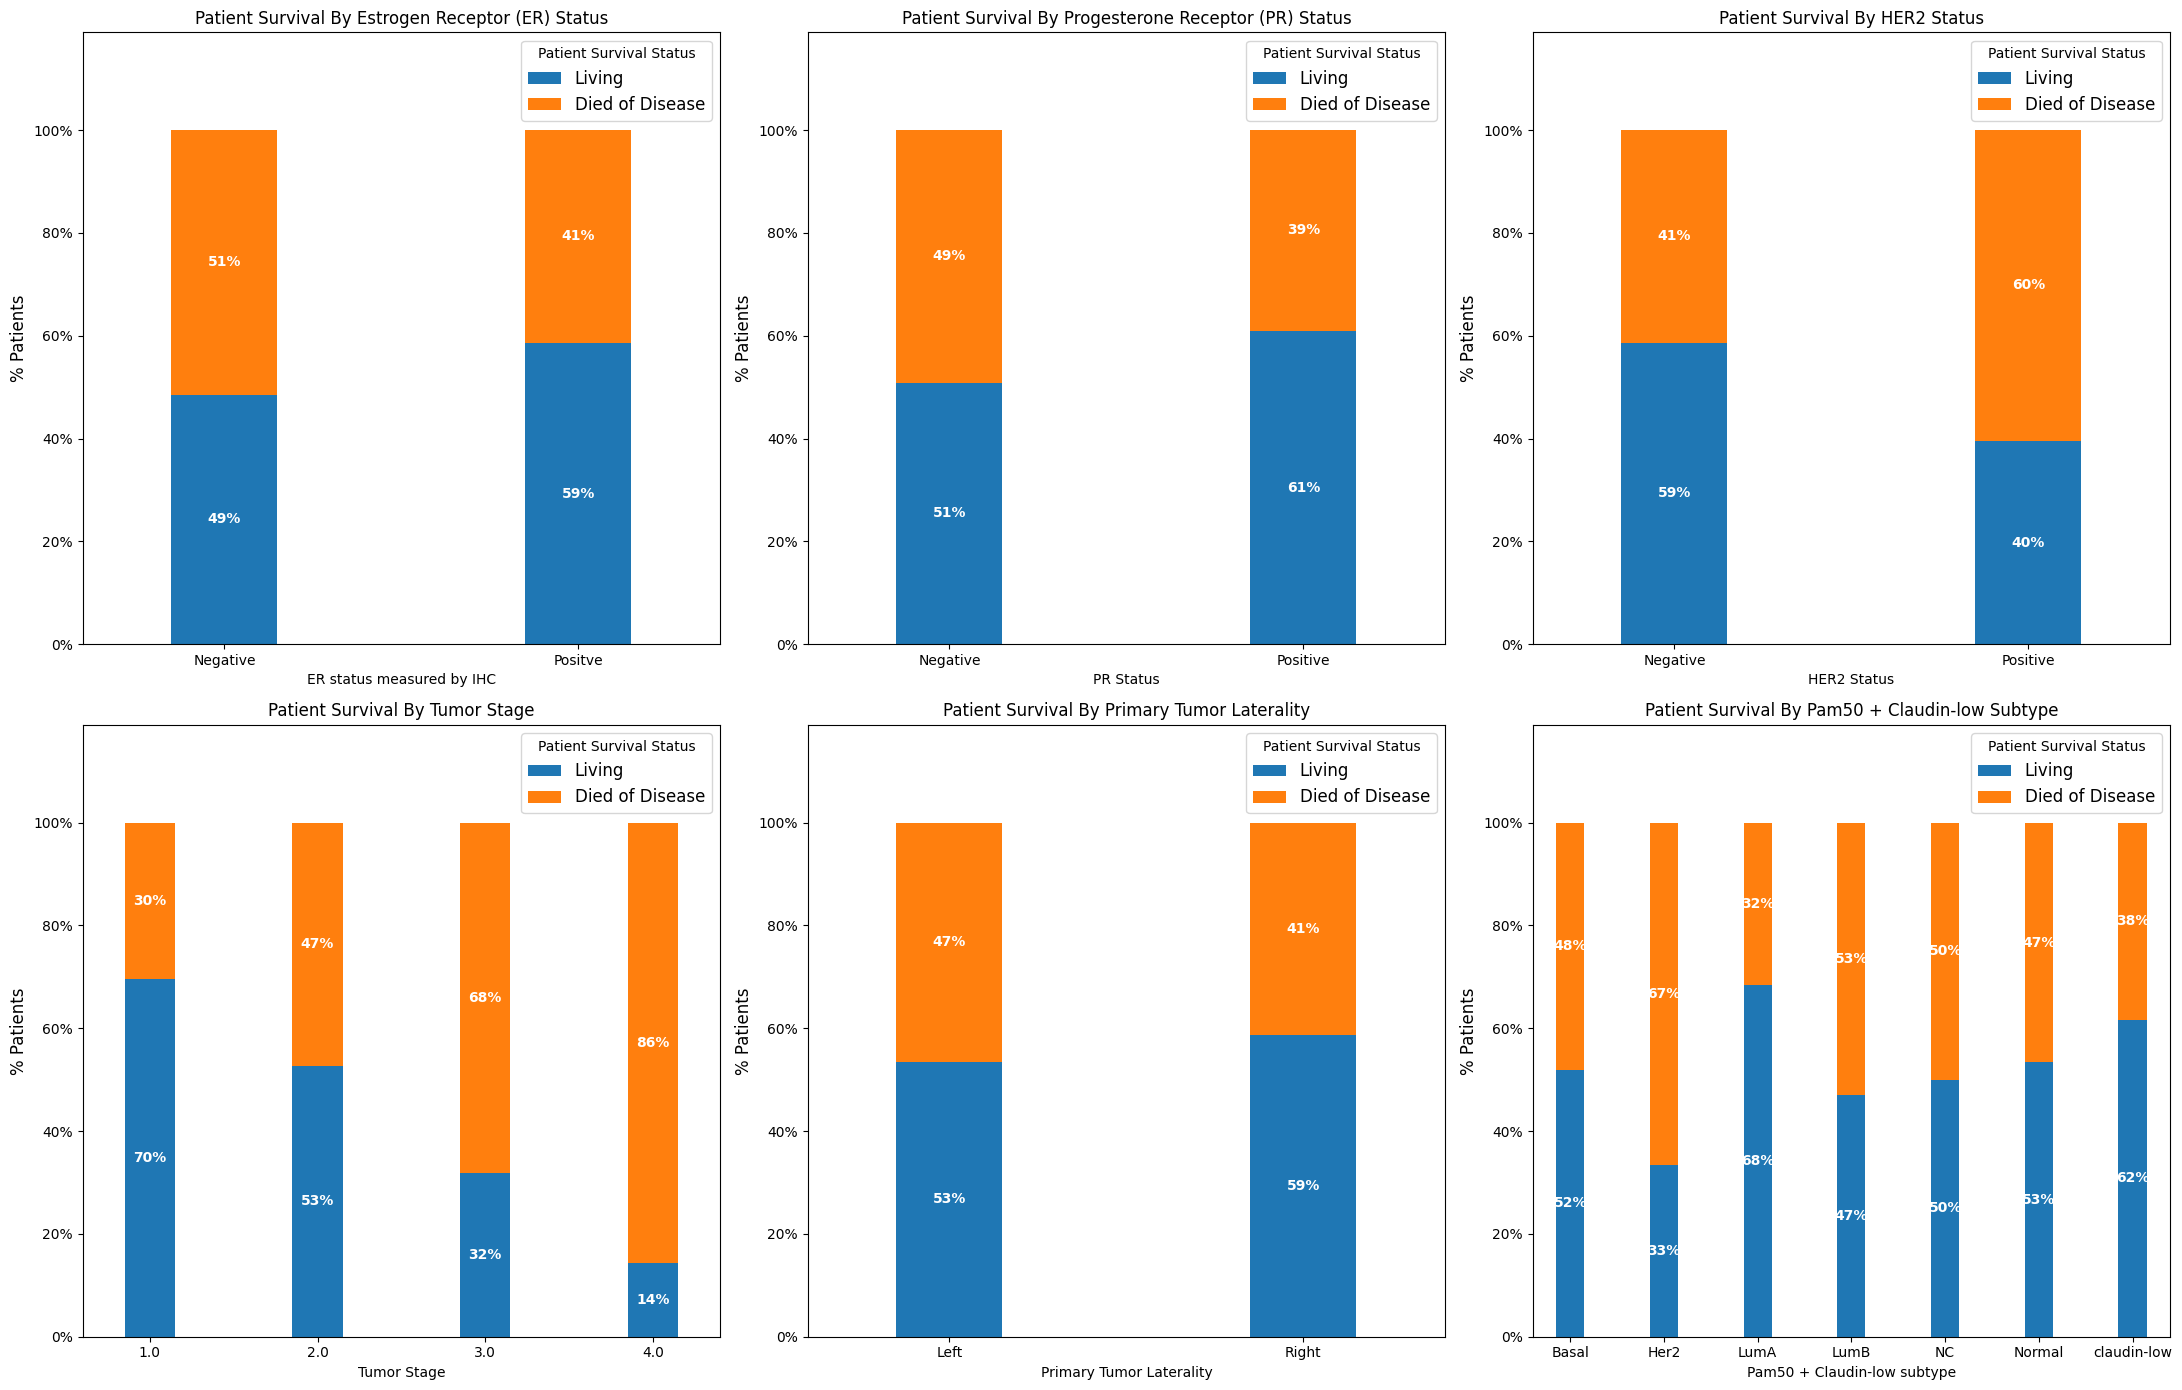

In [526]:
colors = {'Living' : '#1f77b4' , 'Died of Disease' : '#ff7f0e'}

Filtered_data = data[data["Patient's Vital Status"] != "Died of Other Causes"]

Receptor_Status = ['ER status measured by IHC' , 'PR Status' , 'HER2 Status']
Tumor_Characteristics = ['Tumor Stage' , 'Primary Tumor Laterality' , 'Pam50 + Claudin-low subtype']
Receptor_Status_Titles = ['Patient Survival By Estrogen Receptor (ER) Status' , 'Patient Survival By Progesterone Receptor (PR) Status' , 'Patient Survival By HER2 Status']
Tumor_Characteristics_Titles = ['Patient Survival By Tumor Stage' , 'Patient Survival By Primary Tumor Laterality' , 'Patient Survival By Pam50 + Claudin-low Subtype']

fig, axes = plt.subplots(nrows = 2 , ncols = 3 , figsize = (22, 14))

# -------------------- Stacked Bar Charts for ER , PR , HER2 Status -------------------- #
for i , feature in enumerate(Receptor_Status):
    Grouped_Data = Filtered_data.groupby([feature , "Patient's Vital Status"]).size().unstack()

    Grouped_Data = Grouped_Data[['Living' , 'Died of Disease']]

    ax = (Grouped_Data.T * 100.0 / Grouped_Data.T.sum()).T.plot(
        kind = 'bar' , width = 0.3 , stacked = True , rot = 0 , color = colors , ax = axes[0 , i])

    ax.yaxis.set_major_formatter(mtick.PercentFormatter())
    ax.legend(loc = 'best' , prop = {'size': 12} , title = 'Patient Survival Status')
    ax.set_ylabel('% Patients' , size = 12)
    ax.set_title(Receptor_Status_Titles[i] , size = 12)
    ax.set_ylim(0 , 119)

    for p in ax.patches:
        height = p.get_height()
        if height > 0:
            ax.annotate(f'{height:.0f}%',
                        (p.get_x() + 0.5 * p.get_width(), p.get_y() + 0.5 * height),
                        ha = 'center' , va = 'center' ,
                        color = 'white' , weight = 'bold' , size = 10)

# -------------------- Stacked Bar Charts for Tumor Stage, Laterality, and Pam50 -------------------- #
for j, feature in enumerate(Tumor_Characteristics):
    Grouped_Data = Filtered_data.groupby([feature , "Patient's Vital Status"]).size().unstack()

    Grouped_Data = Grouped_Data[['Living', 'Died of Disease']]

    ax = (Grouped_Data.T * 100.0 / Grouped_Data.T.sum()).T.plot(
        kind = 'bar' , width = 0.3 , stacked = True , rot = 0 , color = colors , ax = axes[1 , j])

    ax.yaxis.set_major_formatter(mtick.PercentFormatter())
    ax.legend(loc = 'best' , prop = {'size': 12} , title = 'Patient Survival Status')
    ax.set_ylabel('% Patients', size = 12)
    ax.set_title(Tumor_Characteristics_Titles[j] , size = 12)
    ax.set_ylim(0 , 119)

    for p in ax.patches:
        height = p.get_height()
        if height > 0:
            ax.annotate(f'{height:.0f}%',
                        (p.get_x() + 0.5 * p.get_width(), p.get_y() + 0.5 * height),
                        ha = 'center' , va = 'center' ,
                        color = 'white' , weight = 'bold' , size = 10)

plt.tight_layout()
plt.show()

<h2> Data Preprocessing :

---



In [527]:
data["Patient's Vital Status"].replace(to_replace = 'Living' , value = 0 , inplace = True)
data["Patient's Vital Status"].replace(to_replace = 'Died of Disease' , value = 1 , inplace = True )
data["Patient's Vital Status"].replace(to_replace = 'Died of Other Causes' , value = 2 , inplace = True )
data["Overall Survival Status"].replace(to_replace = 'Living' , value = 0 , inplace = True)
data["Overall Survival Status"].replace(to_replace = 'Deceased' , value = 1 , inplace = True )
data['Chemotherapy'].replace(to_replace = 'Yes' , value = 1 , inplace = True )
data['Chemotherapy'].replace(to_replace = 'No' , value = 0 , inplace = True )

In [528]:
data["Patient's Vital Status"] = pd.to_numeric(data["Patient's Vital Status"] , errors = 'coerce')

In [529]:
LB = LabelEncoder()
data['ER status measured by IHC'] = LB.fit_transform(data['ER status measured by IHC'])
data['PR Status'] = LB.fit_transform(data['PR Status'])
data['Radio Therapy'] = LB.fit_transform(data['Radio Therapy'])
data['Hormone Therapy'] = LB.fit_transform(data['Hormone Therapy'])

In [530]:
df_dummies = pd.get_dummies(data , columns = ['Type of Breast Surgery','Cellularity','Pam50 + Claudin-low subtype',
                                            'HER2 status measured by SNP6','Inferred Menopausal State',
                                            'Integrative Cluster','Oncotree Code','Relapse Free Status','3-Gene classifier subtype',
                                            'Primary Tumor Laterality'] ,dtype = 'int')

<h2> Survival Analysis :

---



In [531]:
kmf = KaplanMeierFitter()
kmf.fit(durations = data['Overall Survival (Months)'] , event_observed = data['Overall Survival Status'])

<lifelines.KaplanMeierFitter:"KM_estimate", fitted with 1195 total observations, 523 right-censored observations>

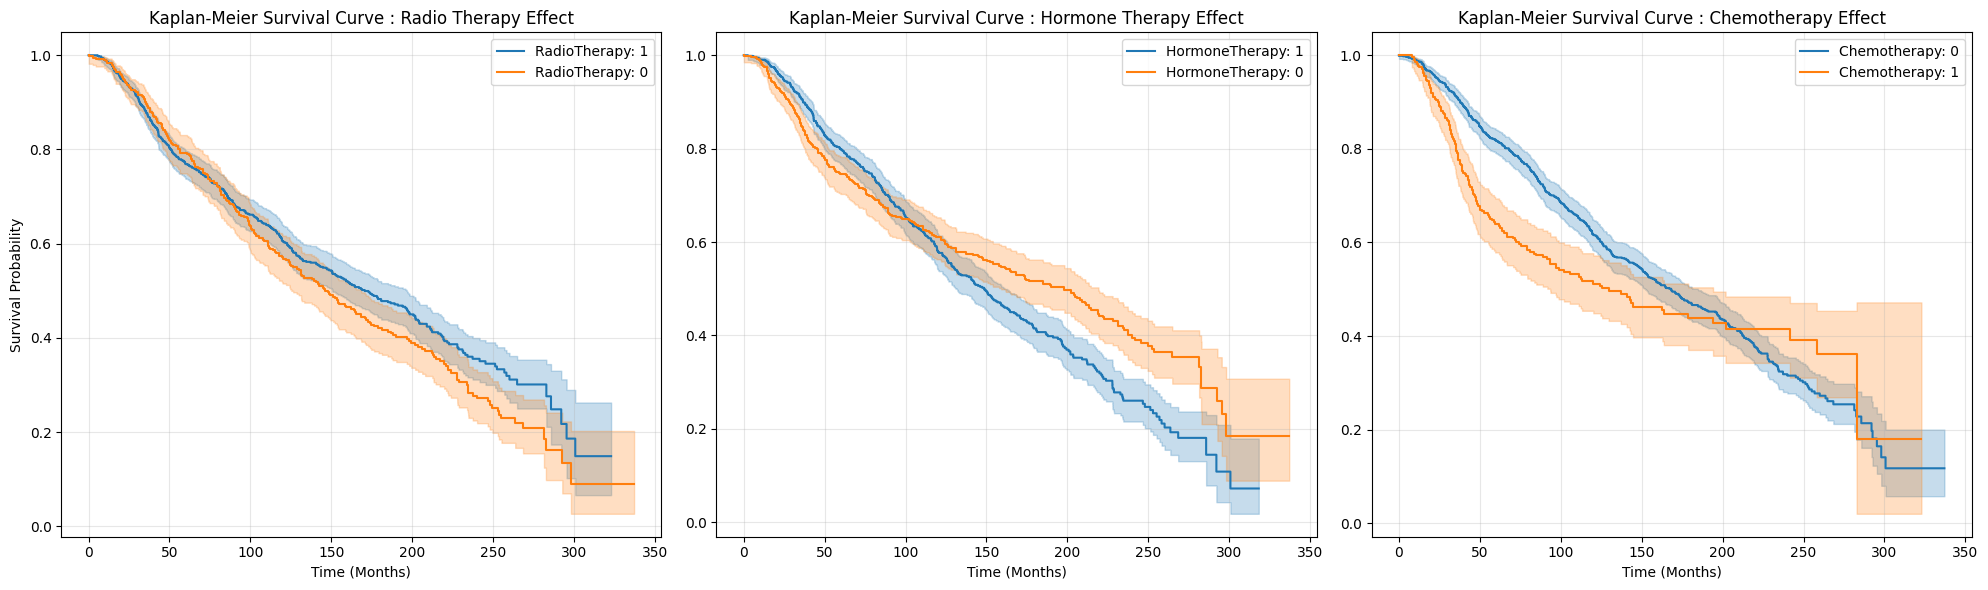

In [532]:
fig , axes = plt.subplots(1 , 3 , figsize = (20 , 6) , tight_layout = True)

for group in data['Radio Therapy'].unique():
    group_data = data[data['Radio Therapy'] == group]
    kmf.fit(group_data['Overall Survival (Months)'], event_observed = group_data['Overall Survival Status'])
    kmf.plot_survival_function( ax = axes[0] , label = f"RadioTherapy: {group}")

axes[0].set_title('Kaplan-Meier Survival Curve : Radio Therapy Effect')
axes[0].set_ylabel('Survival Probability')
axes[0].set_xlabel('Time (Months)')
axes[0].grid(alpha=0.3)


for group in data['Hormone Therapy'].unique():
    group_data = data[data['Hormone Therapy'] == group]
    kmf.fit(group_data['Overall Survival (Months)'], event_observed = group_data['Overall Survival Status'])
    kmf.plot_survival_function( ax = axes[1] , label = f"HormoneTherapy: {group}")

axes[1].set_title('Kaplan-Meier Survival Curve : Hormone Therapy Effect')
axes[1].set_xlabel('Time (Months)')
axes[1].grid(alpha=0.3)


for group in data['Chemotherapy'].unique():
    group_data = data[data['Chemotherapy'] == group]
    kmf.fit(group_data['Overall Survival (Months)'], event_observed = group_data['Overall Survival Status'])
    kmf.plot_survival_function(label = f"Chemotherapy: {group}")

axes[2].set_title('Kaplan-Meier Survival Curve : Chemotherapy Effect')
axes[2].set_xlabel('Time (Months)')
axes[2].grid(alpha=0.3)

plt.show()


<h2> Feature Importance :

---



In [534]:
del df_dummies['Overall Survival Status']
del df_dummies['HER2 Status']

<Axes: >

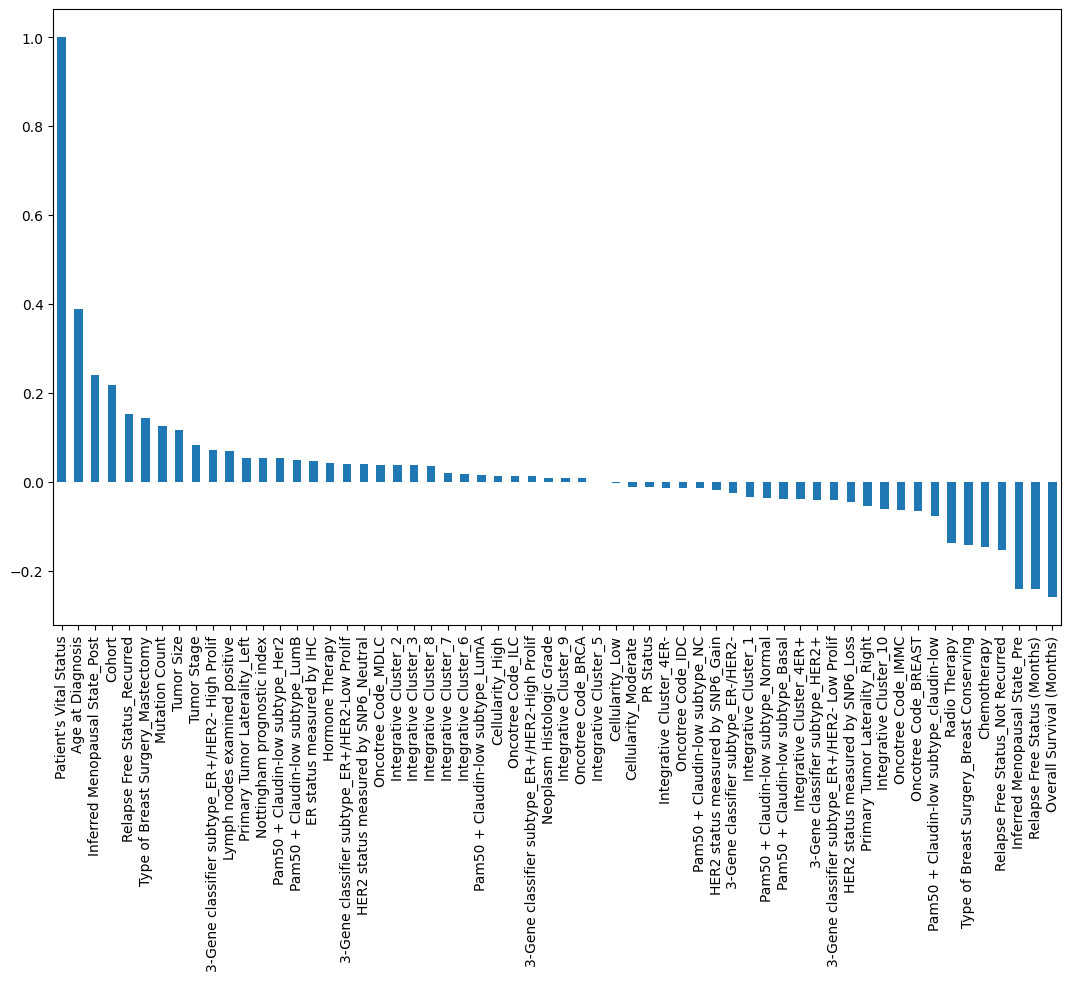

In [535]:
plt.figure(figsize = (13,8))
df_dummies.corr()["Patient's Vital Status"].sort_values(ascending = False).plot(kind = 'bar')

<h1> Oversampling Technique :

---



In [536]:
df_living = df_dummies[df_dummies["Patient's Vital Status"] == 0]
df_deceased = df_dummies[df_dummies["Patient's Vital Status"] == 1]
df_died_of_other = df_dummies[df_dummies["Patient's Vital Status"] == 2]

In [537]:
target_samples = len(df_living)

df_deceased_oversampled = resample(df_deceased , replace = True , n_samples = target_samples , random_state  = 42 )
df_died_of_other_oversampled = resample(df_died_of_other , replace = True , n_samples = target_samples , random_state = 42)
df_oversampled = pd.concat([df_living , df_deceased_oversampled , df_died_of_other_oversampled])
df_oversampled = df_oversampled.sample(frac = 1, random_state = 42).reset_index(drop = True)

<h1> Machine Learning Models :

---



<h2> 1.  Logistic Regression

In [538]:
x = df_oversampled.drop(columns = "Patient's Vital Status",axis = 1)
y = df_oversampled["Patient's Vital Status"]

In [539]:
x_train , x_test , y_train , y_test = train_test_split(x,y,test_size = 0.2)

In [540]:
sc =  StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.fit_transform(x_test)

In [541]:
model = LogisticRegression(multi_class = 'ovr', max_iter = 1000  , random_state = 42)
model.fit(x_train, y_train)

LogisticRegression(max_iter=1000, multi_class='ovr', random_state=42)

In [542]:
y_pred = model.predict(x_test)

In [543]:
print(accuracy_score(y_pred , y_test))

0.8057324840764332


In [544]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.74      0.71      0.73       104
           1       0.90      0.97      0.94       112
           2       0.75      0.71      0.73        98

    accuracy                           0.81       314
   macro avg       0.80      0.80      0.80       314
weighted avg       0.80      0.81      0.80       314



<h3> 2 . SVM Model

In [545]:
x_train , x_test , y_train , y_test = train_test_split(x,y,test_size = 0.2)

In [546]:
sc =  StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.fit_transform(x_test)

In [547]:
svm_class = svm.SVC(kernel = 'linear', decision_function_shape = 'ovr', random_state = 42 , C = 1 )
svm_class.fit(x_train , y_train)

SVC(C=1, kernel='linear', random_state=42)

In [548]:
y_pred = svm_class.predict(x_test)

In [549]:
print(accuracy_score(y_pred , y_test))

0.8343949044585988


In [550]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.87      0.78      0.82       117
           1       0.94      0.92      0.93       108
           2       0.69      0.81      0.75        89

    accuracy                           0.83       314
   macro avg       0.83      0.83      0.83       314
weighted avg       0.84      0.83      0.84       314



<h3> 3. Decision Tree Classifier

In [551]:
clf = DecisionTreeClassifier(random_state = 42)

In [552]:
x_train , x_test , y_train , y_test = train_test_split(x,y,test_size = 0.2)

In [553]:
param_grid={
        'criterion':['gini','entropy'],
        'max_depth':[None , 5,10,15,20],
        'min_samples_split':[2,5,10],
        'min_samples_leaf':[1,2,4]
    }

In [554]:
grid_search = GridSearchCV(estimator = clf , param_grid = param_grid , cv = 5 , scoring = 'accuracy', n_jobs = -1 )

In [555]:
grid_search.fit(x_train ,y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(random_state=42), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [None, 5, 10, 15, 20],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10]},
             scoring='accuracy')

In [556]:
best_params = grid_search.best_params_

In [557]:
best_clf  = DecisionTreeClassifier(**best_params , class_weight = 'balanced', random_state = 42)
best_clf.fit(x_train,y_train)

DecisionTreeClassifier(class_weight='balanced', criterion='entropy',
                       random_state=42)

In [558]:
y_pred = best_clf.predict(x_test)

In [559]:
print(accuracy_score(y_test , y_pred))

0.8757961783439491


In [560]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.88      0.75      0.81        99
           1       0.92      0.97      0.95       109
           2       0.83      0.90      0.86       106

    accuracy                           0.88       314
   macro avg       0.88      0.87      0.87       314
weighted avg       0.88      0.88      0.87       314



<Axes: >

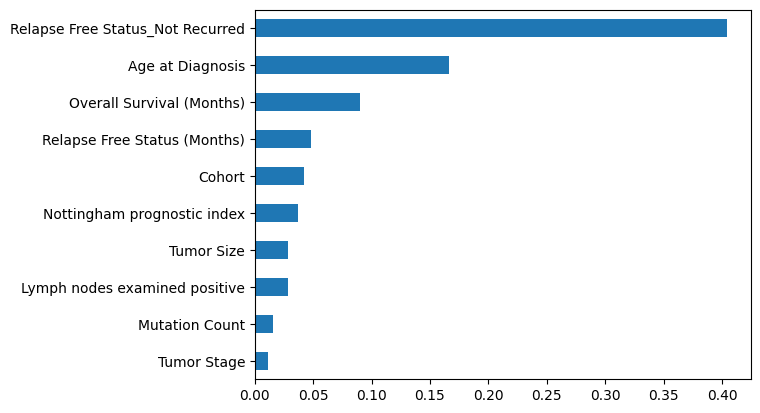

In [561]:
importances = best_clf.feature_importances_
weights = pd.Series(importances , index = x.columns.values)
weights.sort_values()[-10:].plot(kind = 'barh')

<h1> Model Evaluation

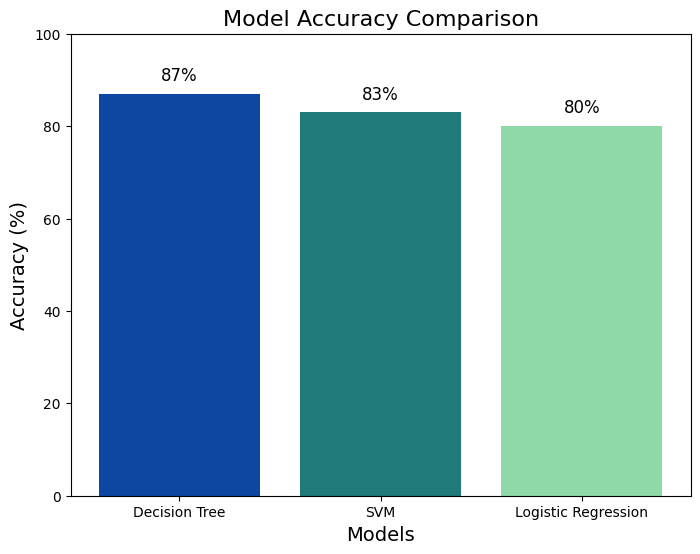

In [569]:
models = ['Decision Tree','SVM','Logistic Regression']
accuracies = [87 , 83 , 80]
plt.figure(figsize = (8 , 6))
bars = plt.bar(models , accuracies , color = ['#0d47a1', '#1f7a7a', '#8fd9a8'])

plt.xlabel('Models', fontsize = 14)
plt.ylabel('Accuracy (%)', fontsize = 14)
plt.title('Model Accuracy Comparison' , fontsize = 16)
plt.ylim(0 , 100)

for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2 , yval + 2 , f'{yval}%' , ha = 'center' , va = 'bottom' , fontsize = 12)

plt.show()

<H1> ROC-AUC CURVE

---



In [563]:
y_pred_proba = model.predict_proba(x_test)[:, 1]

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2732: UserWarning: X has feature names, but LogisticRegression was fitted without feature names
  warnings.warn(


In [564]:
y_prob = best_clf.predict_proba(x_test)

In [565]:
roc_auc = roc_auc_score(y_test, y_prob , multi_class = 'ovr')
print(roc_auc)

0.9049350522840095


In [566]:
lb = LabelBinarizer()
y_test_bin = lb.fit_transform(y_test)

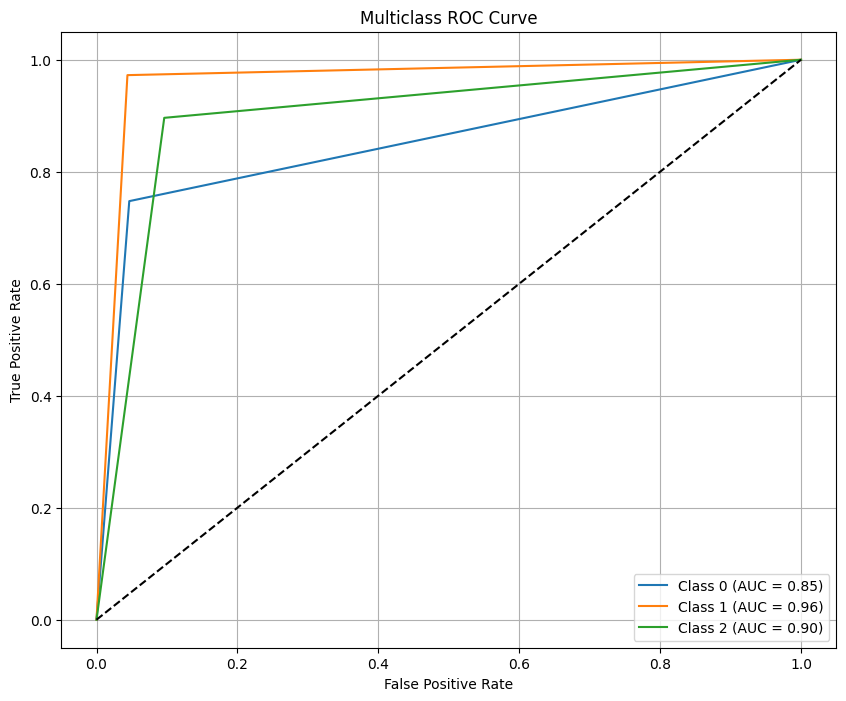

In [567]:
plt.figure(figsize=(10, 8))

for i in range(y_prob.shape[1]):
    fpr , tpr , _ = roc_curve(y_test_bin[:, i], y_prob[:, i])
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr , tpr, label = f'Class {lb.classes_[i]} (AUC = {roc_auc:.2f})')

plt.plot([0, 1], [0, 1], 'k--')

plt.title('Multiclass ROC Curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc = "lower right")
plt.grid(True)
plt.show()